In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yaml

from floris.tools import FlorisInterface

In [3]:
# Instantiate FLORIS with the GCH model
with open('floris_examples/inputs/gch.yaml', 'r') as file:
    input_dict = yaml.safe_load(file)
    solver_dict = input_dict["solver"]

In [50]:
# Set up a 4-turbine wind farm with some partial overlap
D = 126.
spacing = 3.5
spacing = 5
layout_x = np.array([0, D*1*spacing, D*2*spacing, D*3*spacing])
layout_y = [0, 0, 0.5 * D, -0.5 * D]

In [51]:
grid_points_array = range(2, 40)
farm_power_array = np.zeros(len(grid_points_array))

In [52]:
for ii, no_rotor_points in enumerate(grid_points_array):
    print("Evaluating FLORIS with {} grid points.".format(no_rotor_points))
    
    # Update number of rotor points
    solver_dict["turbine_grid_points"] = no_rotor_points

    fi = FlorisInterface(input_dict)
    fi.reinitialize(layout = [layout_x, layout_y], wind_speeds=[8.0])

    # Calculate wind farm power
    fi.calculate_wake()
    farm_power_array[ii] = fi.get_farm_power()[0][0]

Evaluating FLORIS with 2 grid points.
Evaluating FLORIS with 3 grid points.
Evaluating FLORIS with 4 grid points.
Evaluating FLORIS with 5 grid points.
Evaluating FLORIS with 6 grid points.
Evaluating FLORIS with 7 grid points.
Evaluating FLORIS with 8 grid points.
Evaluating FLORIS with 9 grid points.
Evaluating FLORIS with 10 grid points.
Evaluating FLORIS with 11 grid points.
Evaluating FLORIS with 12 grid points.
Evaluating FLORIS with 13 grid points.
Evaluating FLORIS with 14 grid points.
Evaluating FLORIS with 15 grid points.
Evaluating FLORIS with 16 grid points.
Evaluating FLORIS with 17 grid points.
Evaluating FLORIS with 18 grid points.
Evaluating FLORIS with 19 grid points.
Evaluating FLORIS with 20 grid points.
Evaluating FLORIS with 21 grid points.
Evaluating FLORIS with 22 grid points.
Evaluating FLORIS with 23 grid points.
Evaluating FLORIS with 24 grid points.
Evaluating FLORIS with 25 grid points.
Evaluating FLORIS with 26 grid points.
Evaluating FLORIS with 27 grid po

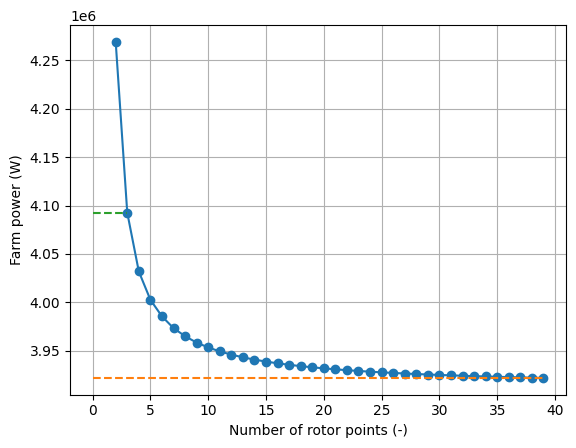

In [53]:
# Plot
fig, ax = plt.subplots()
ax.plot(grid_points_array, farm_power_array, '-o')
ax.plot([0, grid_points_array[-1]], 2 * [farm_power_array[-1]], '--')
ax.plot([0, grid_points_array[1]], 2 * [farm_power_array[1]], '--')
ax.grid(True)
ax.set_xlabel('Number of rotor points (-)')
ax.set_ylabel('Farm power (W)')
plt.show()

In [54]:
pct_inc = []
for i in range(len(farm_power_array)-1):
    y = farm_power_array[i+1] - farm_power_array[i]

    pct_inc.append(y/farm_power_array[i]*100)
    
pct_inc = np.array(pct_inc)


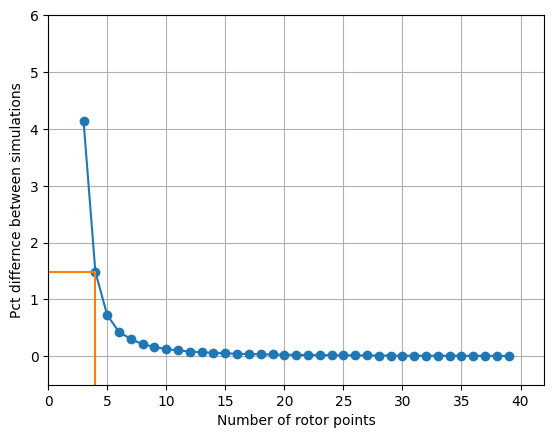

In [55]:
y_want = 2  #Percentage difference we want to be under.

index = next(i for i, v in enumerate(abs(pct_inc)) if v < y_want) #finds the fist index that is under that specific value.

x_vals = np.arange(3,40,1)   #create x values for axis

y_1 = abs(pct_inc[index])    #Find the y value

x_1 = x_vals[index]

plt.plot(range(3,40),abs(pct_inc),'o-')

plt.xlabel("Number of rotor points")
plt.ylabel("Pct differnce between simulations")
plt.grid()

plt.ylim([-0.5, 6])
plt.xlim([0, 42])

xlim,ylim = plt.xlim(), plt.ylim()
plt.plot([xlim[0], x_1, x_1],[y_1, y_1, ylim[0]])

plt.show()